In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [25]:
# CSI1
person = [0.6872484, 0.731786, 0.6978365, 0.7109533, 0.7375206, 0.71309596, 0.7338994, 0.6708477]
person_rand = [0.52251065, 0.5921922, 0.5671788, 0.55762744, 0.5415789, 0.6148989, 0.5501764, 0.5507523]
face = [0.7886125, 0.78814816, 0.73579144, 0.7684372, 0.8293382, 0.8232406, 0.74868196, 0.79822886]
face_rand = [0.5257417, 0.6560925, 0.55376166, 0.63059705, 0.7003415, 0.58739954, 0.62684995, 0.64623654]
animal = [0.56426567, 0.6775726, 0.69710064, 0.6748647, 0.6726483, 0.68421054, 0.62449133, 0.64853334]
animal_rand = [0.589247, 0.45026132, 0.5575394, 0.5550466, 0.58286977, 0.615829, 0.52794886, 0.60008323]
vehicle = [0.59421974, 0.5637893, 0.5727286, 0.5684437, 0.6081429, 0.5570568, 0.6512882, 0.57939655]
vehicle_rand = [0.52646995, 0.6020863, 0.5496894, 0.48552048, 0.5577619, 0.53376436, 0.51704544, 0.5417777]
outdoor = [0.52025896, 0.585304, 0.62048745, 0.52075356, 0.56692046, 0.52386177, 0.5475713, 0.5082153]
outdoor_rand = [0.5410401, 0.49395314, 0.54146016, 0.39339128, 0.61440825, 0.42011276, 0.50135714, 0.50670195]
sports = [0.6768543, 0.69238096, 0.7487986, 0.65159816, 0.6741654, 0.76020813, 0.7519045, 0.5777974]
sports_rand = [0.53988457, 0.49670994, 0.5432783, 0.6093685, 0.5987542, 0.61558807, 0.6171179, 0.53144455] 
food = [0.6797321, 0.6218552, 0.6740275, 0.67799246, 0.6127959, 0.6847761, 0.68054545, 0.6965519]
food_rand = [0.6290821, 0.5779613, 0.54434246, 0.5551136, 0.50647193, 0.62916845, 0.55624545, 0.46897593]
furniture = [0.6031989, 0.63830644, 0.63573414, 0.6274924, 0.65625006, 0.6754571, 0.6501588, 0.6132014]
furniture_rand = [0.44, 0.54158604, 0.45963353, 0.6728171, 0.5799377, 0.54893345, 0.4950072, 0.62812614]
tool = [0.48190376, 0.49803388, 0.57821757, 0.5369094, 0.52890235, 0.5515351, 0.647769, 0.5571828]
tool_rand = [0.5822346, 0.5113446, 0.4730608, 0.5310801, 0.5463523, 0.47345993, 0.52993643, 0.6174372]

In [26]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [27]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [28]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

face :
t-statistic: 7.255901640737164 p-value: 2.0927050221229965e-06
animal :
t-statistic: 3.984202286899552 p-value: 0.0006787348766239419
person :
t-statistic: 11.091381430230557 p-value: 1.276131516714875e-08
furniture :
t-statistic: 3.0967292859766506 p-value: 0.003941719516346234
vehicle :
t-statistic: 2.943810010489869 p-value: 0.0053379409030660805
sports :
t-statistic: 4.489033713083815 p-value: 0.00025489179871801277
food :
t-statistic: 4.815518169234954 p-value: 0.0001372235328463688
outdoor :
t-statistic: 1.68029876745261 p-value: 0.05753279300095399
tool :
t-statistic: 0.5723129255522287 p-value: 0.288092833195096
Bonferroni:

Reject: [ True  True  True  True  True  True  True False False]
pvals corrected: [1.88343452e-05 6.10861389e-03 1.14851837e-07 3.54754756e-02
 4.80414681e-02 2.29402619e-03 1.23501180e-03 5.17795137e-01
 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True False False]
pvals corrected: [9.41717260e-06 1.22172278e-03

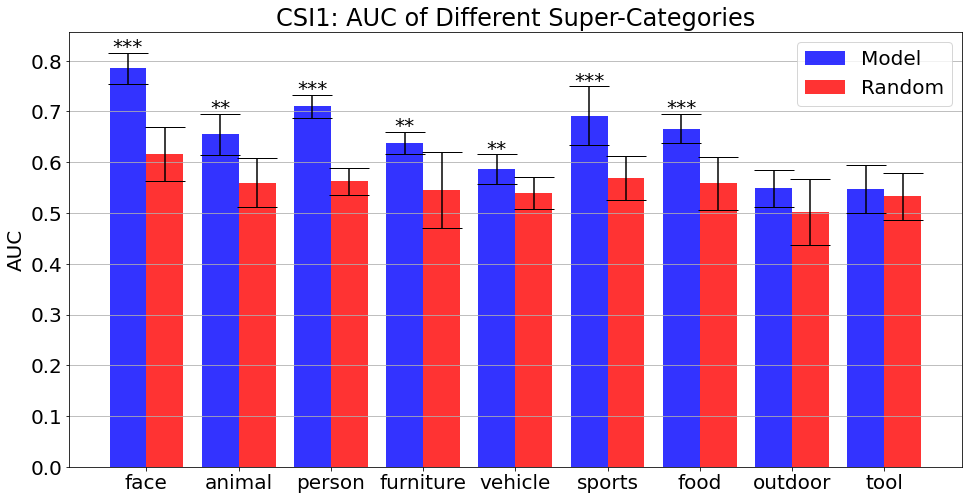

In [29]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories1 = categories
categories1_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI1: AUC of Different Super-Categories', leg_loc='upper right')

In [30]:
# CSI2
person = [0.67836624, 0.66491324, 0.6566219, 0.664065, 0.6582407, 0.6215639, 0.67556584, 0.66583264]
person_rand = [0.51089317, 0.54153883, 0.5654649, 0.5361051, 0.4972712, 0.5082618, 0.5413131, 0.44929534]
face = [0.71093994, 0.71265465, 0.74914336, 0.7041305, 0.7444476, 0.7202829, 0.71355623, 0.70148605]
face_rand = [0.53421175, 0.45776162, 0.45535472, 0.5, 0.4626168, 0.51034504, 0.4985836, 0.47008306]
animal = [0.5748944, 0.55725384, 0.57005006, 0.5865802, 0.63339967, 0.5177994, 0.6010287, 0.53771853]
animal_rand = [0.49015507, 0.4844659, 0.5225083, 0.5405117, 0.5114591, 0.6066065, 0.48151848, 0.5823982]
vehicle = [0.5657935, 0.58732694, 0.61825716, 0.5470172, 0.49528375, 0.62410986, 0.5475709, 0.5242358]
vehicle_rand = [0.44881025, 0.48178354, 0.5232221, 0.5241225, 0.55298865, 0.4892648, 0.5403967, 0.58087665]
outdoor = [0.56511235, 0.57151383, 0.6080026, 0.5393587, 0.4643584, 0.5184285, 0.49576807, 0.5264578]
outdoor_rand = [0.6778344, 0.45343286, 0.5262157, 0.37841484, 0.3889146, 0.43914288, 0.5260869, 0.6353923]
sports = [0.6794268, 0.5847569, 0.63735074, 0.63097125, 0.67639244, 0.64079785, 0.5850624, 0.6443287]
sports_rand = [0.55406386, 0.5559193, 0.554128, 0.5279231, 0.68458873, 0.5231893, 0.5875625, 0.51001155]
food = [0.6488998, 0.63752383, 0.5047163, 0.5638079, 0.5089914, 0.5927434, 0.55957204, 0.5633458]
food_rand = [0.5974482, 0.6372464, 0.46310243, 0.54379356, 0.57405126, 0.4140406, 0.569643, 0.51295406]
furniture = [0.65667576, 0.61195767, 0.5822423, 0.5794518, 0.63118255, 0.60531497, 0.5518538, 0.62161064]
furniture_rand = [0.55927104, 0.59151244, 0.5227734, 0.6425929, 0.48945147, 0.5475872, 0.5846406, 0.57144296]
tool = [0.52489537, 0.48391703, 0.5726136, 0.5360665, 0.55178124, 0.62415224, 0.5884712, 0.5990265]
tool_rand = [0.49112839, 0.5107384, 0.46740657, 0.6043416, 0.55506444, 0.5167872, 0.5784539, 0.50190604]

face :
t-statistic: 19.50128378288334 p-value: 7.569401676690397e-12
animal :
t-statistic: 2.15703880695391 p-value: 0.02443588394139913
person :
t-statistic: 10.072079914032619 p-value: 4.272815421036758e-08
furniture :
t-statistic: 2.057927870562122 p-value: 0.029358783596749902
vehicle :
t-statistic: 2.110064269412037 p-value: 0.026665081669860608
sports :
t-statistic: 3.138357770987155 p-value: 0.0036288256425644405
food :
t-statistic: 1.0497467850600184 p-value: 0.15580934864921356
outdoor :
t-statistic: 0.784782264428913 p-value: 0.2228293044687824
tool :
t-statistic: 1.3890524893607983 p-value: 0.09325868492511291
Bonferroni:

Reject: [ True False  True False False  True False False False]
pvals corrected: [6.81246151e-11 2.19922955e-01 3.84553388e-07 2.64229052e-01
 2.39985735e-01 3.26594308e-02 1.00000000e+00 1.00000000e+00
 8.39328164e-01]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True False False False]
pvals corrected: [6.81246151e-11 4.40381754e-02 1.922

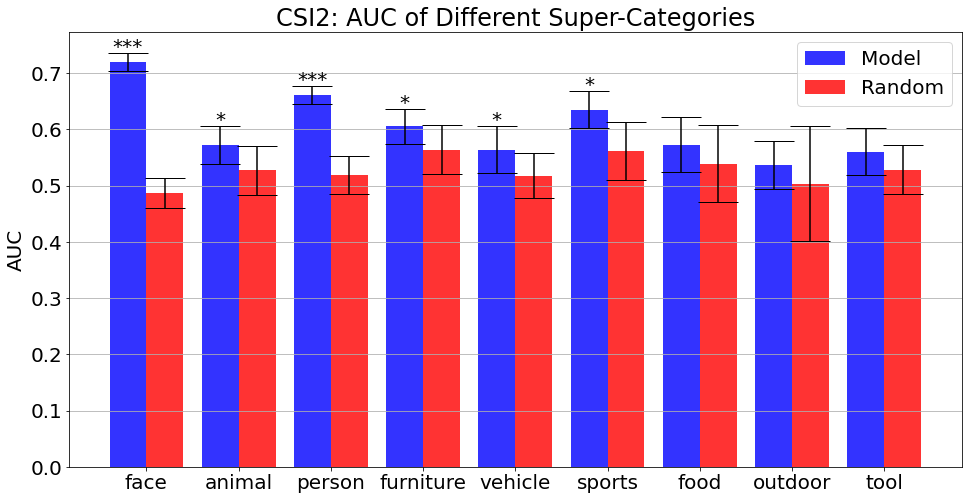

In [31]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories2 = categories
categories2_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI2: AUC of Different Super-Categories', leg_loc='upper right')

In [32]:
# CSI3
person = [0.6892828, 0.74465173, 0.74832326, 0.6851131, 0.6914098, 0.713693, 0.652018, 0.71289873]
person_rand = [0.58880347, 0.4866366, 0.56141675, 0.5658974, 0.44583294, 0.5600343, 0.53215307, 0.58266294]
face = [0.75733334, 0.7367424, 0.77411115, 0.6919797, 0.71207994, 0.6838198, 0.7075667, 0.7548126]
face_rand = [0.63568336, 0.60665023, 0.52338886, 0.48312074, 0.563013, 0.59616375, 0.6194508, 0.66143197] 
animal = [0.6724888, 0.70090544, 0.6382501, 0.6219726, 0.62581307, 0.63806677, 0.64818054, 0.6845043]
animal_rand = [0.5490027, 0.59121317, 0.55439746, 0.5704594, 0.55895853, 0.5844081, 0.5174978, 0.5781396]
vehicle = [0.5763557, 0.6166951, 0.6052805, 0.60612893, 0.60651445, 0.5592266, 0.56496274, 0.5761675]
vehicle_rand = [0.57196975, 0.48009413, 0.56286216, 0.48806453, 0.5972717, 0.5316685, 0.4567569, 0.52443373]
outdoor = [0.56865555, 0.562342, 0.65735304, 0.6008251, 0.4853147, 0.55980396, 0.60997593, 0.55634475]
outdoor_rand = [0.5116091, 0.48311254, 0.51191175, 0.4768693, 0.5240255, 0.52632356, 0.5643029, 0.5102273]
sports = [0.69019115, 0.70254207, 0.6150451, 0.60983104, 0.626829, 0.6997043, 0.7020624, 0.6662088]
sports_rand = [0.5008164, 0.6389331, 0.58138466, 0.50583005, 0.5916447, 0.54381716, 0.63109374, 0.5707745]
food = [0.6440869, 0.6991728, 0.55657494, 0.67441756, 0.65356076, 0.7037592, 0.6011727, 0.59039646]
food_rand = [0.56740683, 0.51128495, 0.5121613, 0.6755732, 0.50865674, 0.5367598, 0.525158, 0.51311517]
furniture = [0.51808184, 0.66198385, 0.61064285, 0.6113936, 0.616498, 0.58685476, 0.55069786, 0.6254037]
furniture_rand = [0.5445623, 0.5197939, 0.5510476, 0.52185506, 0.60762626, 0.54658604, 0.5552659, 0.48625714]
tool = [0.452477, 0.56485367, 0.52790225, 0.48062015, 0.5009285, 0.54088706, 0.45806316, 0.5015945]
tool_rand = [0.49835527, 0.5915581, 0.4951792, 0.476359, 0.54038095, 0.49013442, 0.4453649, 0.54030585]

face :
t-statistic: 5.857469285531132 p-value: 2.082231336801901e-05
animal :
t-statistic: 6.887821196811294 p-value: 3.7339857208525205e-06
person :
t-statistic: 7.816024284609957 p-value: 8.967633429360855e-07
furniture :
t-statistic: 2.7744667965821423 p-value: 0.007455359621483457
vehicle :
t-statistic: 3.267288352806592 p-value: 0.0028080861856017722
sports :
t-statistic: 4.021402956120022 p-value: 0.0006309896784079043
food :
t-statistic: 3.510363818795327 p-value: 0.0017315728993678233
outdoor :
t-statistic: 3.060562858628068 p-value: 0.004235179645926305
tool :
t-statistic: -0.2946510587689463 p-value: 0.38629221197606695
Bonferroni:

Reject: [ True  True  True False  True  True  True  True False]
pvals corrected: [1.87400820e-04 3.36058715e-05 8.07087009e-06 6.70982366e-02
 2.52727757e-02 5.67890711e-03 1.55841561e-02 3.81166168e-02
 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True False]
pvals corrected: [6.24669401e-05 1.68029357e

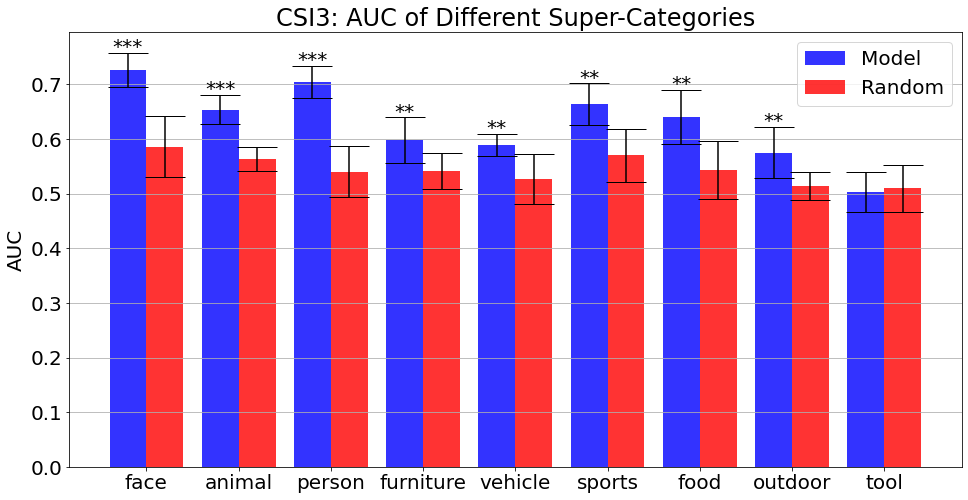

In [33]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories3 = categories
categories3_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI3: AUC of Different Super-Categories', leg_loc='upper right')

In [34]:
# CSI4
person = [0.657839, 0.6701668, 0.63967377, 0.71381444, 0.7165294, 0.70747334, 0.64101213, 0.71920973]
person_rand = [0.52627933, 0.581278, 0.5513955, 0.5682062, 0.6673329, 0.6167088, 0.5403764, 0.570776]
face = [0.6543803, 0.75369084, 0.7807295, 0.79629636, 0.8286017, 0.73829496, 0.7435088, 0.744908]
face_rand = [0.5369925, 0.54589164, 0.572462, 0.6423576, 0.6390218, 0.5644904, 0.519499, 0.5823103]
animal = [0.646608, 0.7250858, 0.6694543, 0.6704557, 0.7189478, 0.6498139, 0.6224233, 0.5868348] 
animal_rand = [0.48229825, 0.6154826, 0.53617954, 0.579426, 0.535898, 0.5362042, 0.6380002, 0.5402477] 
vehicle = [0.6104497, 0.6080496, 0.6088078, 0.608108, 0.61691934, 0.6023682, 0.6155907, 0.58209175]
vehicle_rand = [0.49444443, 0.54233867, 0.50633603, 0.4692476, 0.4889159, 0.49014515, 0.5304258, 0.47531408] 
outdoor = [0.5375, 0.53869057, 0.5749393, 0.52029705, 0.5238163, 0.49274045, 0.47709343, 0.5094587]
outdoor_rand = [0.6926588, 0.43531746, 0.63531554, 0.5430693, 0.48263988, 0.36232823, 0.5153216, 0.6403048]
sports = [0.64152956, 0.67037976, 0.6818182, 0.7002024, 0.6642845, 0.6463712, 0.5977796, 0.5579874]
sports_rand = [0.5338816, 0.5017514, 0.50572956, 0.52641755, 0.5938896, 0.65974027, 0.496875, 0.54239]
food = [0.6599146, 0.6879188, 0.5544599, 0.6903784, 0.74056816, 0.6228871, 0.62962973, 0.7471861]
food_rand = [0.4894575, 0.5029442, 0.40048543, 0.5456414, 0.4478409, 0.55033237, 0.3081427, 0.51969695] 
furniture = [0.59366316, 0.5645464, 0.52461654, 0.5246165, 0.54332304, 0.5870889, 0.52299464, 0.61575514]
furniture_rand = [0.55885416, 0.5039752, 0.62863404, 0.4563915, 0.55935854, 0.53388155, 0.36951873, 0.6231771]
tool = [0.5616474, 0.4697751, 0.5541667, 0.5038359, 0.6289362, 0.4957778, 0.6154831, 0.55957097]
tool_rand = [0.47986227, 0.5167328, 0.61241317, 0.559127, 0.5006687, 0.60006756, 0.44367334, 0.53658974]

face :
t-statistic: 7.4466828119626705 p-value: 1.5610041456910763e-06
animal :
t-statistic: 4.279047105454272 p-value: 0.0003819531587374074
person :
t-statistic: 5.218074901248838 p-value: 6.51065122629754e-05
furniture :
t-statistic: 0.9187881556371437 p-value: 0.18688270349793779
vehicle :
t-statistic: 10.893133179144868 p-value: 1.6027679656117157e-08
sports :
t-statistic: 3.889158591973238 p-value: 0.0008181532967039385
food :
t-statistic: 5.303978041758187 p-value: 5.568127418504798e-05
outdoor :
t-statistic: -0.40141183466799896 p-value: 0.3470885792535313
tool :
t-statistic: 0.6119062323243158 p-value: 0.2752043431357695
Bonferroni:

Reject: [ True  True  True False  True  True  True False False]
pvals corrected: [1.40490373e-05 3.43757843e-03 5.85958610e-04 1.00000000e+00
 1.44249117e-07 7.36337967e-03 5.01131468e-04 1.00000000e+00
 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True  True  True False  True  True  True False False]
pvals corrected: [7.02451866e-06 6.87515686e

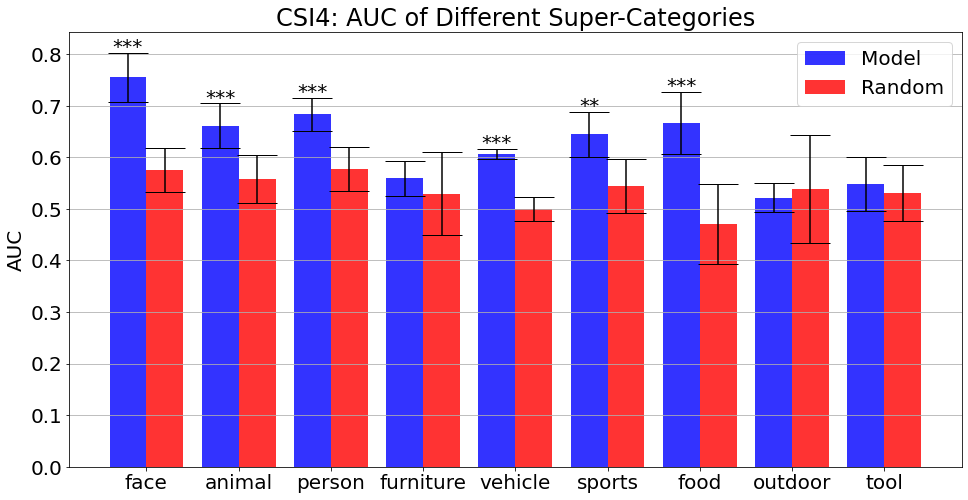

In [35]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = [face, animal, person, furniture, vehicle, sports, food, outdoor, tool]
categories_rand = [face_rand, animal_rand, person_rand, furniture_rand,
                   vehicle_rand, sports_rand, food_rand, outdoor_rand, tool_rand]
categories4 = categories
categories4_rand = categories_rand
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'CSI4: AUC of Different Super-Categories', leg_loc='upper right')

face :
t-statistic: 19.47210506583981 p-value: 7.724353837556444e-12
animal :
t-statistic: 8.257216552975871 p-value: 4.728229311991493e-07
person :
t-statistic: 23.446846087259342 p-value: 6.167862754710991e-13
furniture :
t-statistic: 4.975811099684465 p-value: 0.00010172344066223785
vehicle :
t-statistic: 8.805339186730125 p-value: 2.2038165342763025e-07
sports :
t-statistic: 7.360332456357377 p-value: 1.7814372237922365e-06
food :
t-statistic: 6.345933575453262 p-value: 9.052911665990266e-06
outdoor :
t-statistic: 1.2758534863471644 p-value: 0.11138485758501264
tool :
t-statistic: 1.244797995365124 p-value: 0.11682056889331913
Bonferroni:

Reject: [ True  True  True  True  True  True  True False False]
pvals corrected: [6.95191845e-11 4.25540638e-06 5.55107648e-12 9.15510966e-04
 1.98343488e-06 1.60329350e-05 8.14762050e-05 1.00000000e+00
 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True False False]
pvals corrected: [3.47595923e-11 1.06385160

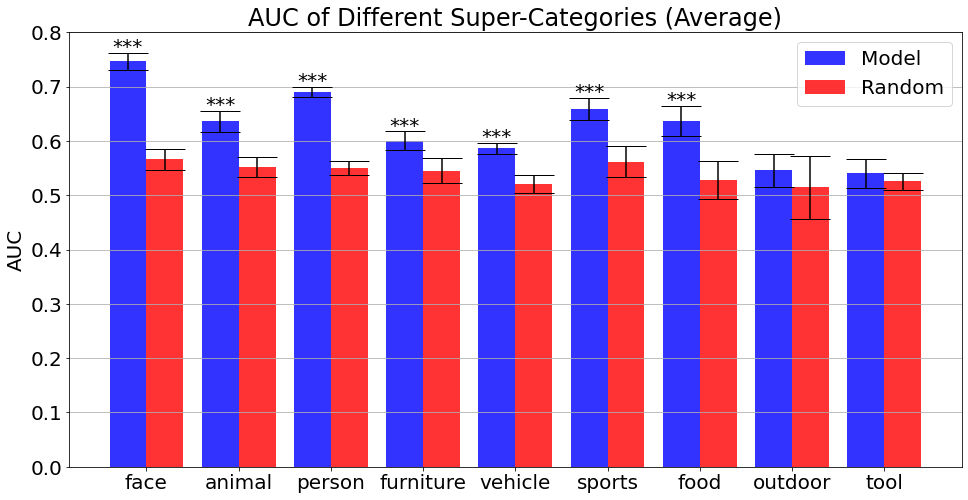

In [36]:
names = ['face', 'animal', 'person', 'furniture', 'vehicle', 'sports', 'food', 'outdoor', 'tool']
categories = (np.array(categories1)+np.array(categories2)+np.array(categories3)+np.array(categories4))/4.0
categories_rand = (np.array(categories1_rand)+np.array(categories2_rand)+np.array(categories3_rand)+np.array(categories4_rand))/4.0
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'AUC of Different Super-Categories (Average)', leg_loc='upper right')